# Implementation: Swarm Sampling

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from parallel_tempering import energy, f

#### Running the code for a given number of chains and epochs

In [7]:
num_chains = 6
num_epochs = 10000

In [18]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering_respawn.py {num_epochs}

acceptance for temp=6: 92.27%, received: 100.00%, respawned: 3.03%
acceptance for temp=4.5: 91.91%, received: 94.74%, respawned: 1.01%
acceptance for temp=1.5: 82.48%, received: 73.68%, respawned: 0.00%
acceptance for temp=3: 88.48%, received: 94.74%, respawned: 1.01%
acceptance for temp=7.5: 93.98%, received: 0.00%, respawned: 7.07%
acceptance for temp=1: 80.30%, received: 78.95%, respawned: 0.00%
Total time elapsed: 36.70 sec


In [19]:
#! mpiexec -n {num_chains} python -m mpi4py parallel_tempering.py {num_epochs}

#### Loading in the results

In [20]:
all_results = np.zeros(shape=(num_chains, num_epochs, 2))

for i in range(num_chains):
    all_results[i] = np.load(f'results/process_{i}.npy')
    
print(all_results.shape)

(6, 10000, 2)


#### Plotting the results

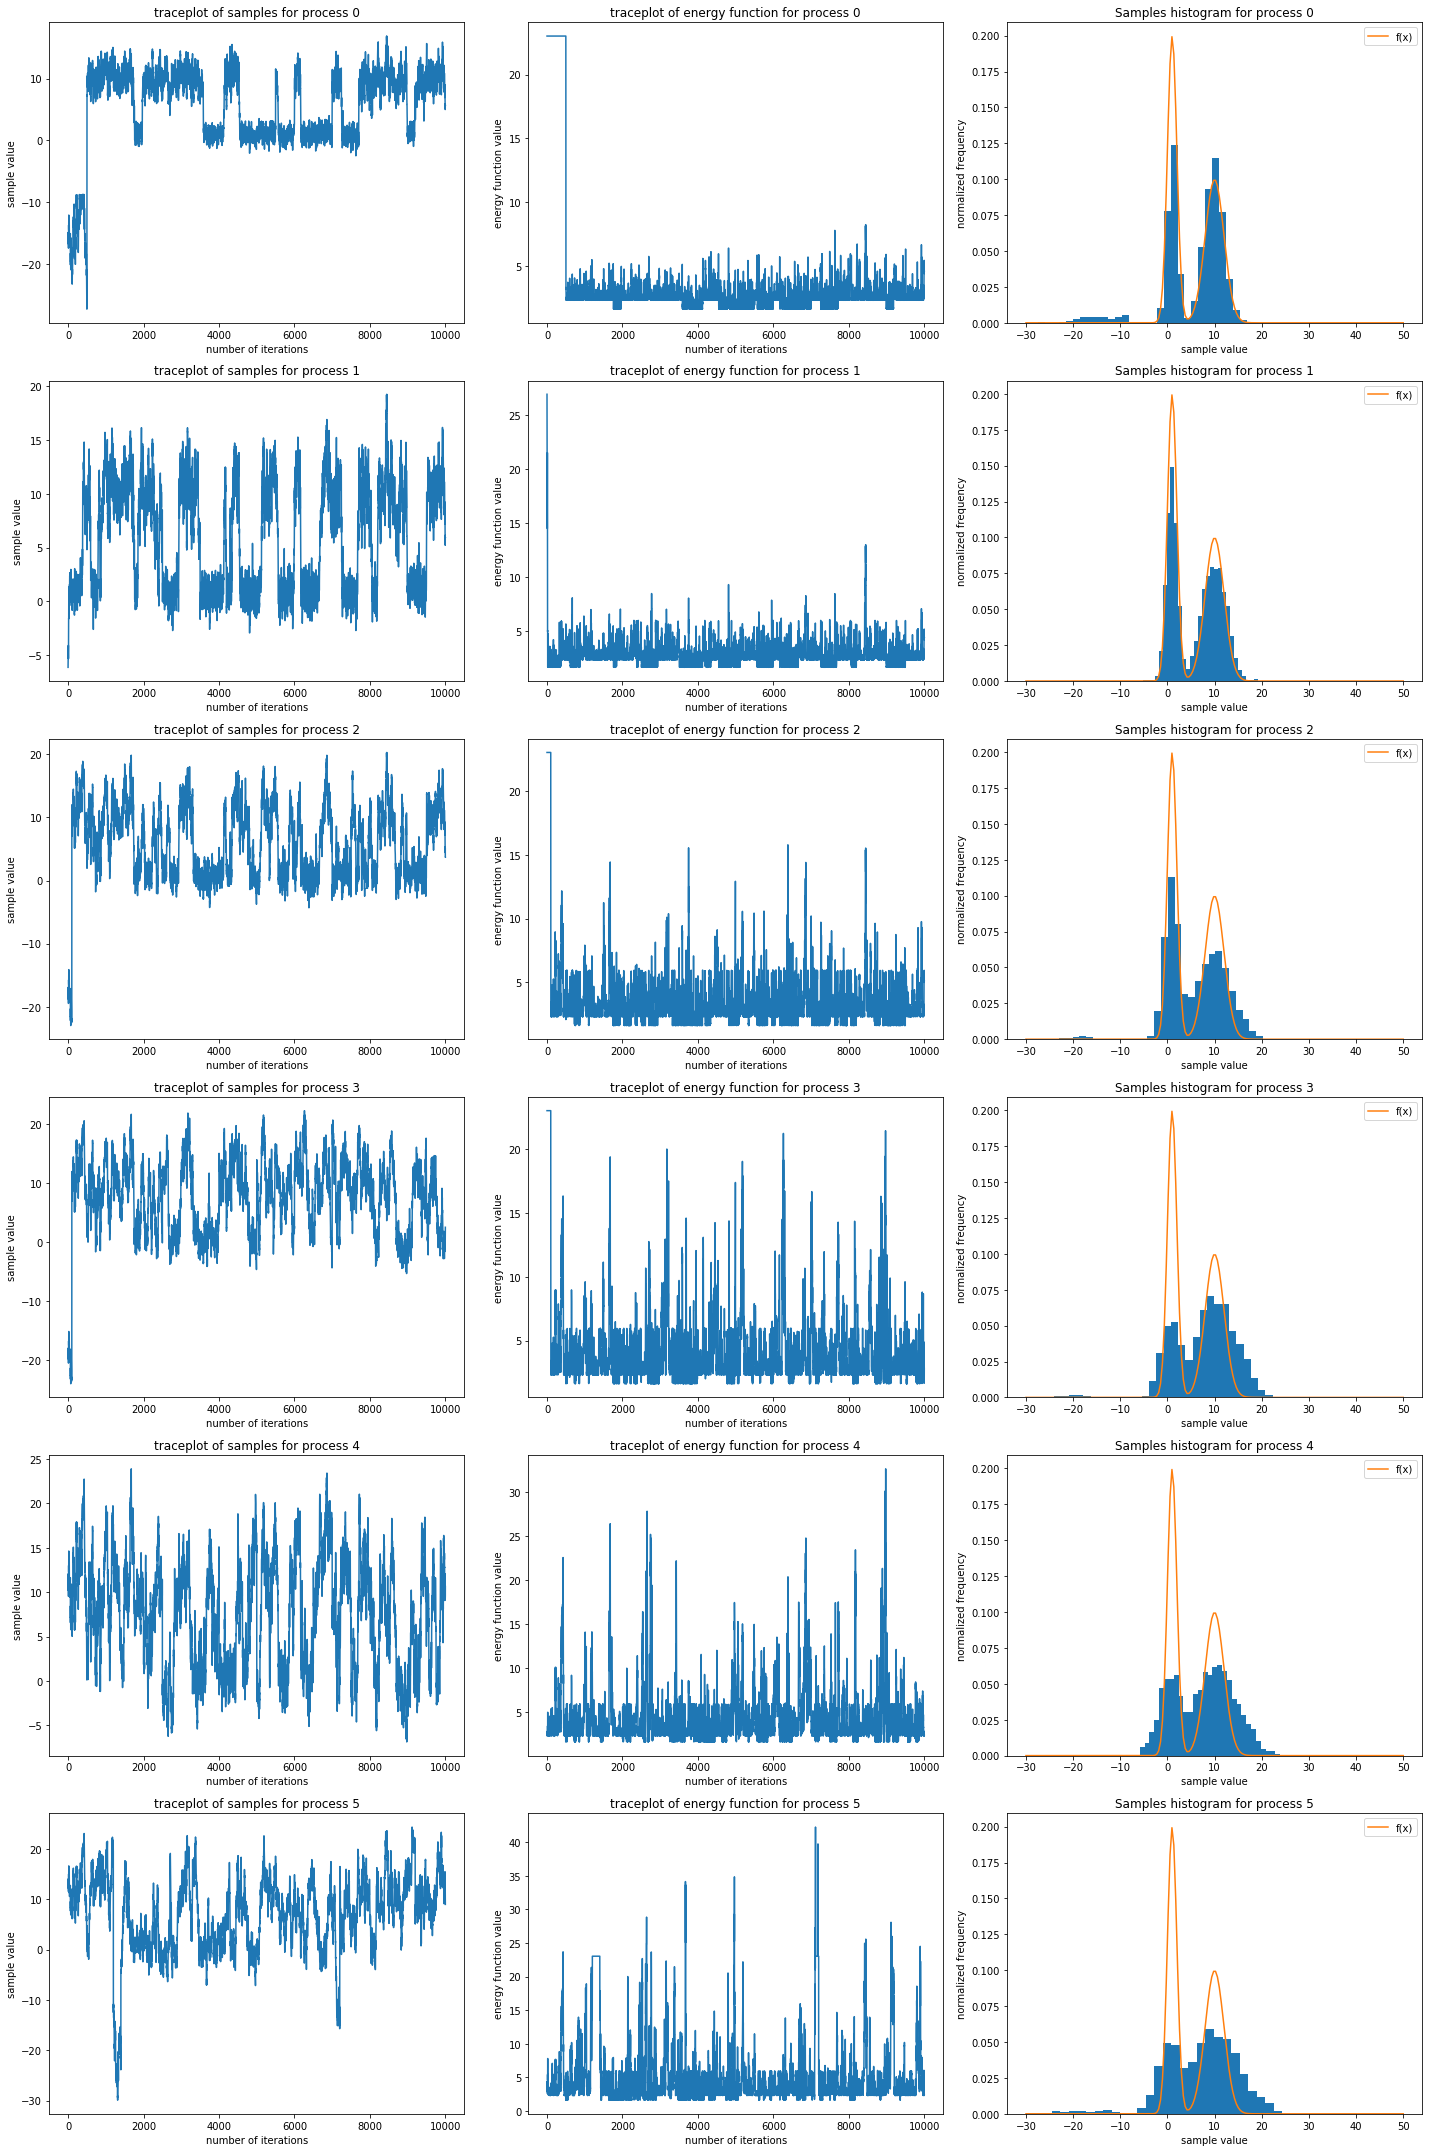

In [21]:
xgrid = np.linspace(-30,50,200)
fig, ax = plt.subplots(nrows=num_chains, ncols=3, figsize=(20,5*num_chains))
ax = ax.ravel()

for i in range(num_chains):
    accumulator = all_results[i]
    ax[3*i+0].plot(range(num_epochs), accumulator[:,0])
    ax[3*i+0].set_title(f'traceplot of samples for process {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')

    ax[3*i+1].plot(range(num_epochs), accumulator[:,1])
    ax[3*i+1].set_title(f'traceplot of energy function for process {i}')
    ax[3*i+1].set_ylabel('energy function value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(accumulator[:,0], bins=30, density=True)
    ax[3*i+2].plot(xgrid, f(xgrid), label='f(x)')
    ax[3*i+2].set_title(f'Samples histogram for process {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
    ax[3*i+2].legend()
fig.tight_layout()

In [12]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering.py {num_epochs}

acceptance for temp=6: 92.84%, exchange: 100.00%
acceptance for temp=7.5: 93.35%, exchange: 0.00%
acceptance for temp=4.5: 91.49%, exchange: 94.74%
acceptance for temp=3: 88.83%, exchange: 89.47%
acceptance for temp=1: 80.81%, exchange: 84.21%
Total time elapsed: 39.06222414970398 seconds
acceptance for temp=1.5: 82.60%, exchange: 63.16%


#### Loading in the results

In [13]:
all_results = np.zeros(shape=(num_chains, num_epochs, 2))

for i in range(num_chains):
    all_results[i] = np.load(f'results/process_{i}.npy')
    
print(all_results.shape)

(6, 10000, 2)


#### Plotting the results

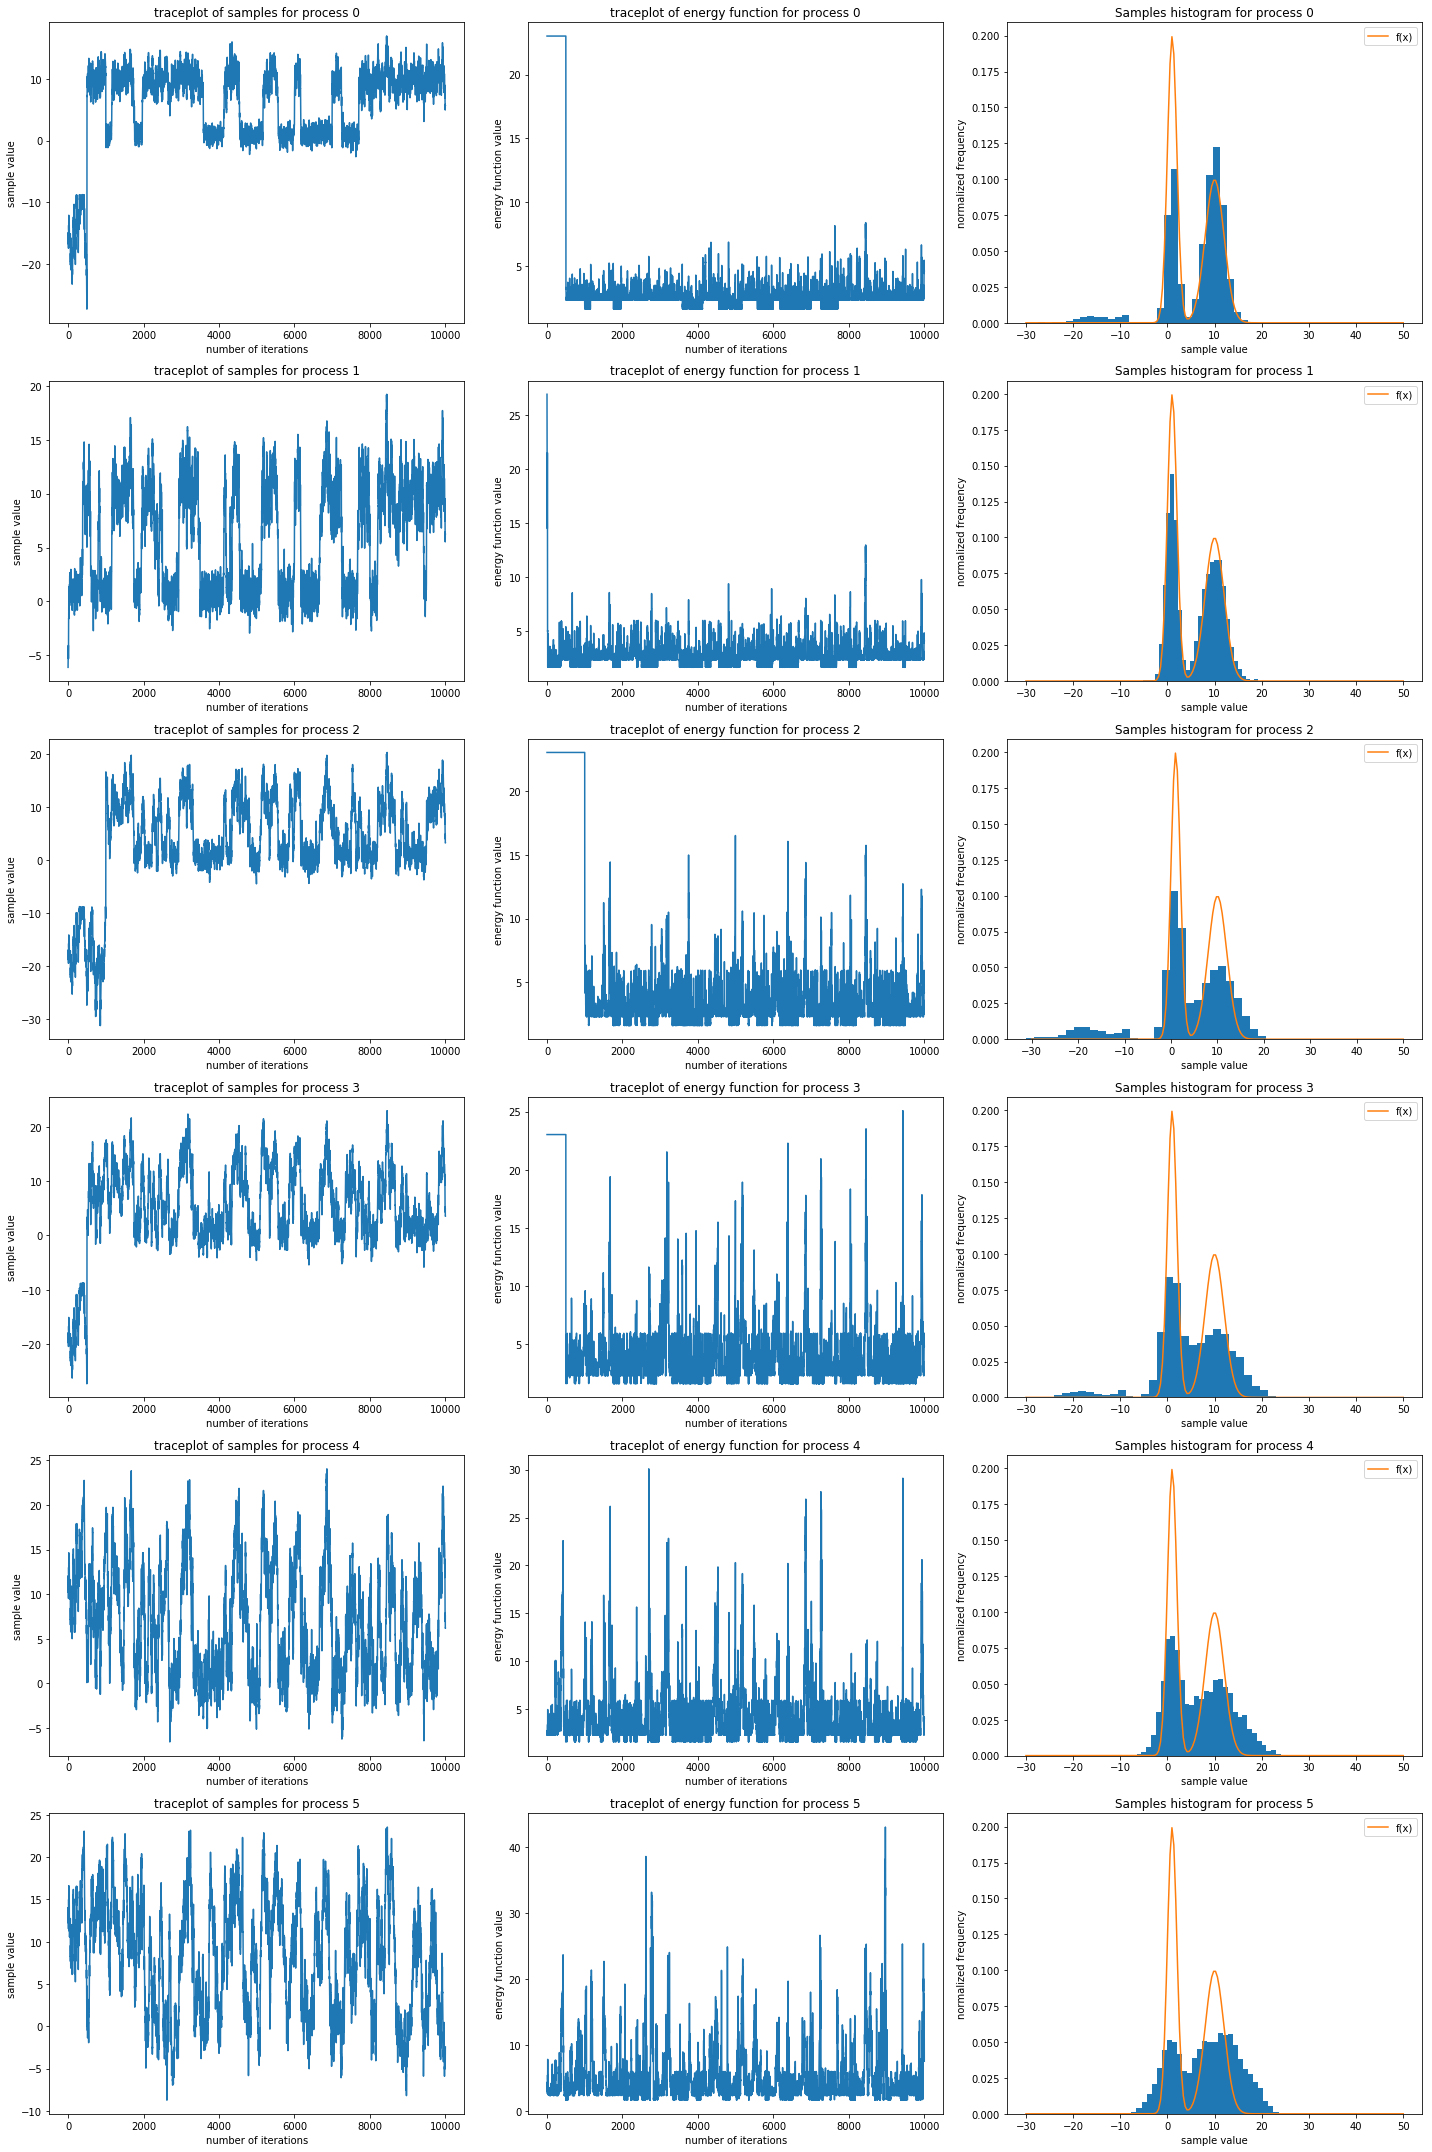

In [14]:
xgrid = np.linspace(-30,50,200)
fig, ax = plt.subplots(nrows=num_chains, ncols=3, figsize=(20,5*num_chains))
ax = ax.ravel()

for i in range(num_chains):
    accumulator = all_results[i]
    ax[3*i+0].plot(range(num_epochs), accumulator[:,0])
    ax[3*i+0].set_title(f'traceplot of samples for process {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')

    ax[3*i+1].plot(range(num_epochs), accumulator[:,1])
    ax[3*i+1].set_title(f'traceplot of energy function for process {i}')
    ax[3*i+1].set_ylabel('energy function value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(accumulator[:,0], bins=30, density=True)
    ax[3*i+2].plot(xgrid, f(xgrid), label='f(x)')
    ax[3*i+2].set_title(f'Samples histogram for process {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
    ax[3*i+2].legend()
fig.tight_layout()